In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/wine.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
df['Target'].value_counts()

,count
Target,
1,71
0,59
2,48


In [ ]:
X = df.drop(columns = ['Target'])
y = df['Target']

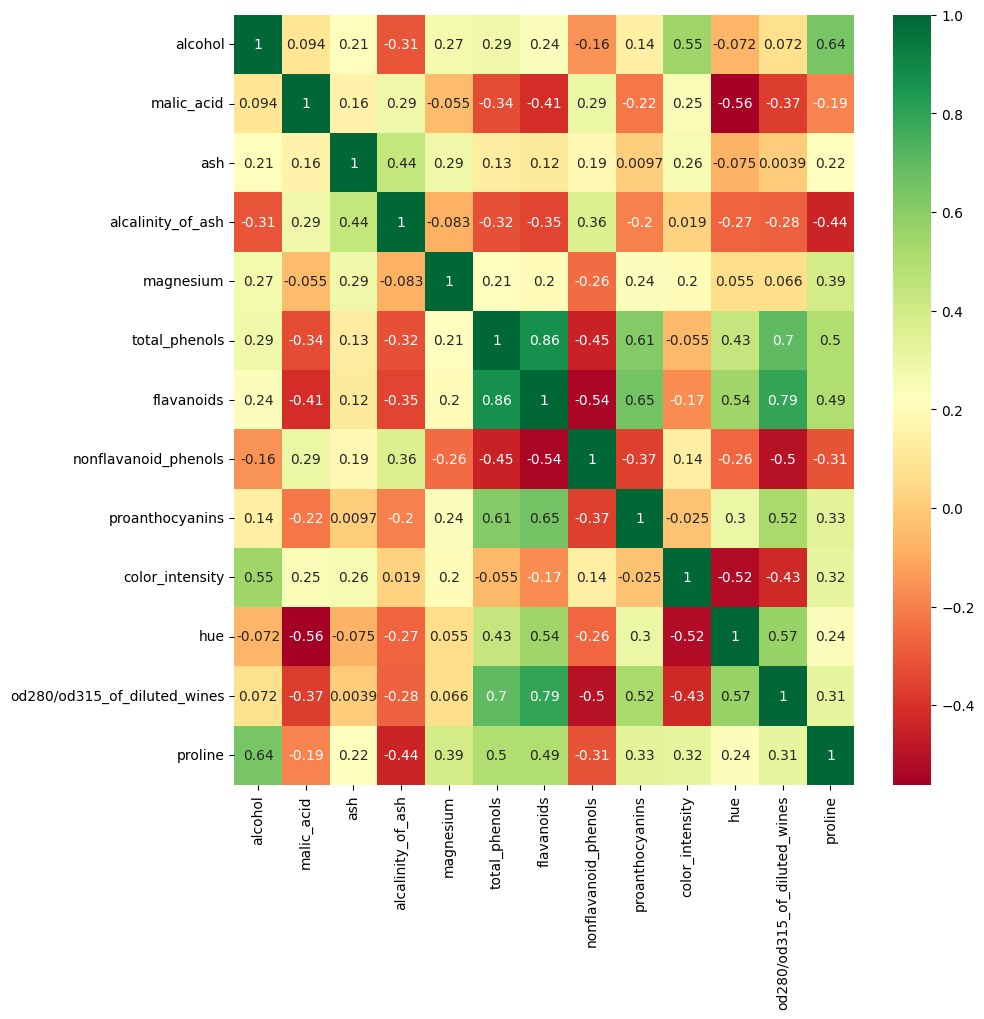

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

sns.heatmap(X.corr() , annot = True , cmap = 'RdYlGn')

plt.show()

**VIF calculation**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_1 = sm.add_constant(X)
X_1.head()

,const,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1.0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1.0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X_1.columns

Index(['const', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
vif_df = pd.DataFrame()
vif_df['variable'] = X_1.columns
vif_df['VIF'] = [variance_inflation_factor(X_1.values , i) for i in range(14)]
vif_df

,variable,VIF
0,const,680.485185
1,alcohol,2.460372
2,malic_acid,1.656647
3,ash,2.185448
4,alcalinity_of_ash,2.238732
5,magnesium,1.417855
6,total_phenols,4.334519
7,flavanoids,7.029350
8,nonflavanoid_phenols,1.796380
9,proanthocyanins,1.975683


In [ ]:
X_2 = X_1.drop(columns=['flavanoids'])
vif_df = pd.DataFrame()
vif_df['variable'] = X_2.columns
vif_df['VIF'] = [variance_inflation_factor(X_2.values , i) for i in range(13)]
vif_df

,variable,VIF
0,const,667.887786
1,alcohol,2.460263
2,malic_acid,1.641028
3,ash,2.056538
4,alcalinity_of_ash,2.196267
5,magnesium,1.399653
6,total_phenols,2.959707
7,nonflavanoid_phenols,1.687216
8,proanthocyanins,1.789547
9,color_intensity,3.026303


In [ ]:
X_3 = X_2.drop(columns = ['const'])

In [ ]:
X_3.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_3)
X_scaled = scaler.transform(X_3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,y,random_state=0)
modelA = KNeighborsClassifier()

modelA.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
print(modelA.score(xtrain,ytrain))

0.9699248120300752


In [ ]:
print(modelA.score(xtest,ytest))

0.9777777777777777
